In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4


In [4]:
cols = confirmed_df.keys()


In [5]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [6]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []

total_active = [] 
india_cases = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()

    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)

    mortality_rate.append(death_sum/confirmed_sum)

    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())


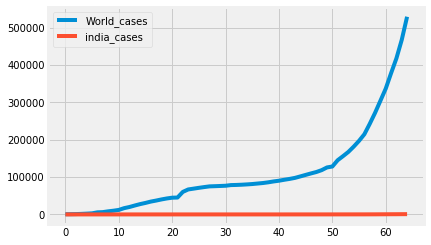

In [105]:
plt.plot(world_cases,label='World_cases')
plt.plot(india_cases,label='india_cases')
plt.legend()

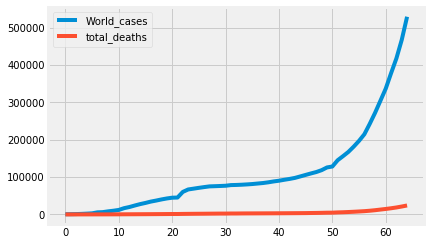

In [106]:
plt.plot(world_cases,label='World_cases')
plt.plot(total_deaths,label='total_deaths')
plt.legend()

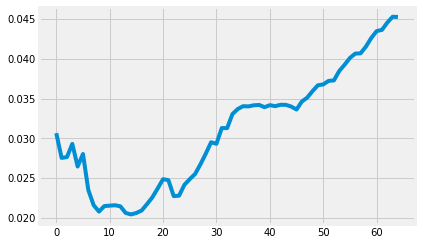

In [107]:
plt.plot(mortality_rate)

In [7]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
india_daily_increase = daily_increase(india_cases)


In [8]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [9]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [10]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [11]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False) 

In [12]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

C:\Users\VEERAMANI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 17389.080887083477
MSE: 534157816.02108634


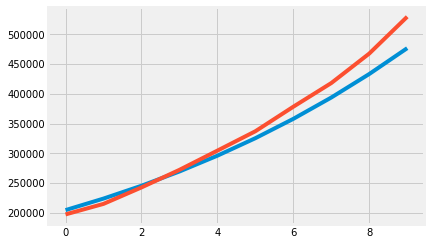

In [13]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [14]:
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('03/27/2020', 524493.0),
 ('03/28/2020', 576869.0),
 ('03/29/2020', 634229.0),
 ('03/30/2020', 696963.0),
 ('03/31/2020', 765483.0),
 ('04/01/2020', 840228.0),
 ('04/02/2020', 921662.0),
 ('04/03/2020', 1010276.0),
 ('04/04/2020', 1106590.0),
 ('04/05/2020', 1211154.0)}

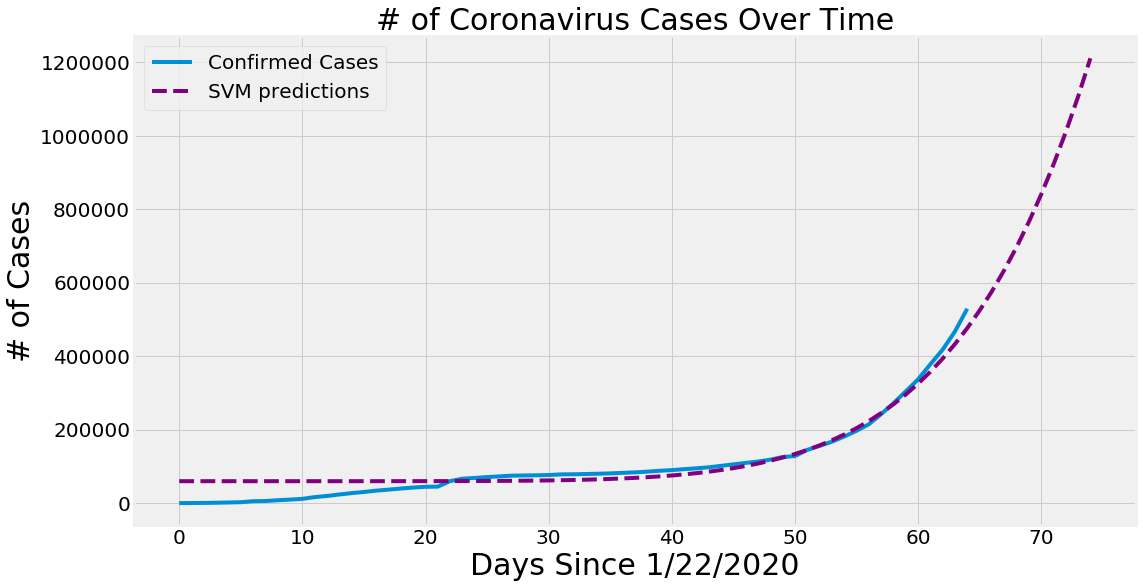

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [16]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [17]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 20030.29365411787
MSE: 682412603.040651


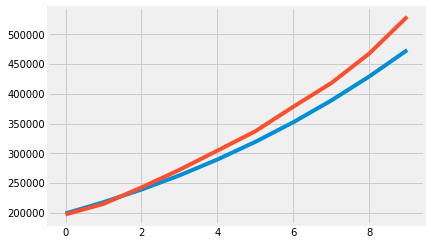

In [18]:
plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)

In [19]:
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('03/27/2020', 522299.0),
 ('03/28/2020', 575722.0),
 ('03/29/2020', 634090.0),
 ('03/30/2020', 697714.0),
 ('03/31/2020', 766922.0),
 ('04/01/2020', 842049.0),
 ('04/02/2020', 923445.0),
 ('04/03/2020', 1011471.0),
 ('04/04/2020', 1106500.0),
 ('04/05/2020', 1208918.0)}

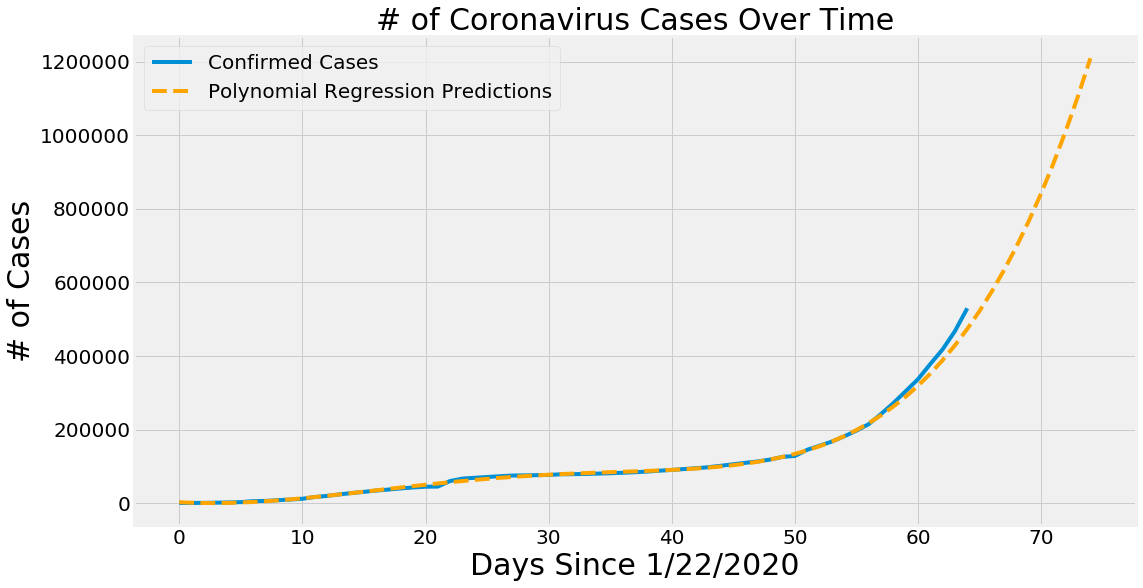

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

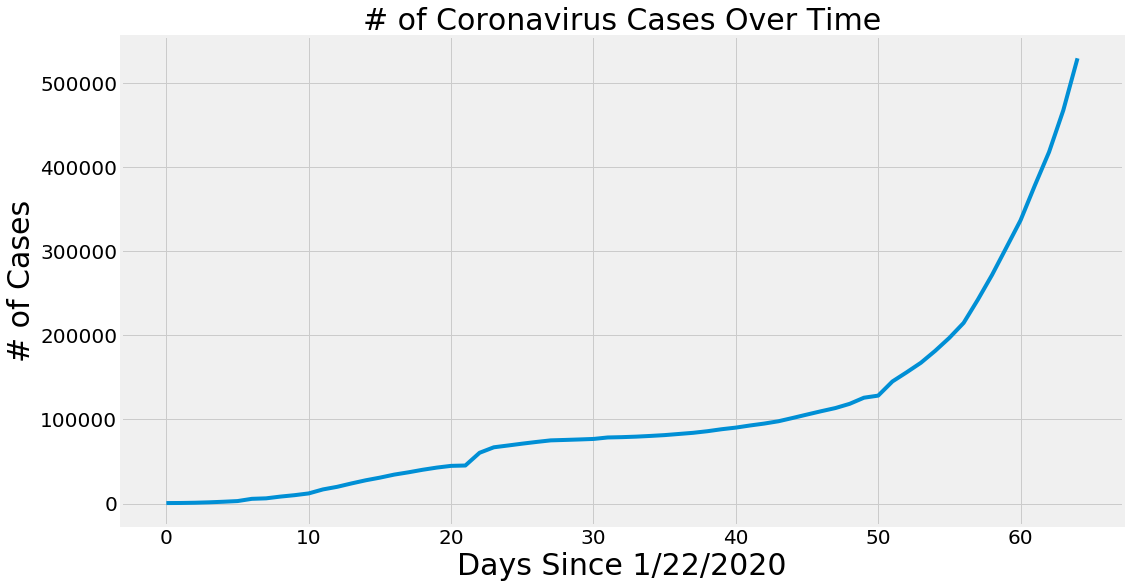

In [21]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

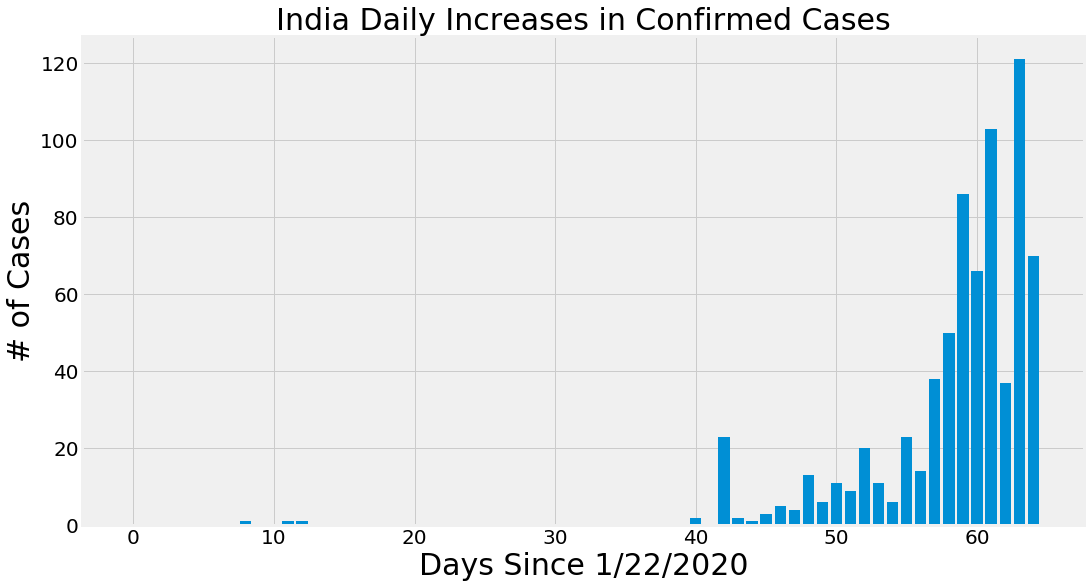

In [22]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_increase)
plt.title('India Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [23]:
india_con=[]
for i in range(0,65):
    if(india_cases[i:]>=[1]):
        india_con.append(india_cases[i])

In [109]:
from copy import copy, deepcopy
days_since_1_30 = deepcopy(days_since_1_22[0:57])


In [26]:
X_train_confirmed_india, X_test_confirmed_india, y_train_confirmed_india, y_test_confirmed_india= train_test_split(days_since_1_30, india_con, test_size=0.15, shuffle=False) 

In [94]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=0.1,degree=5, C=10)
svm_confirmed.fit(X_train_confirmed_india, y_train_confirmed_india)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 192.93019113775262
MSE: 56128.992281755156


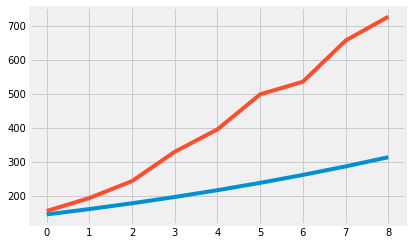

In [95]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed_india)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed_india)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed_india))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed_india))

In [96]:
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('03/27/2020', 660.0),
 ('03/28/2020', 713.0),
 ('03/29/2020', 768.0),
 ('03/30/2020', 827.0),
 ('03/31/2020', 890.0),
 ('04/01/2020', 956.0),
 ('04/02/2020', 1026.0),
 ('04/03/2020', 1100.0),
 ('04/04/2020', 1179.0),
 ('04/05/2020', 1262.0)}

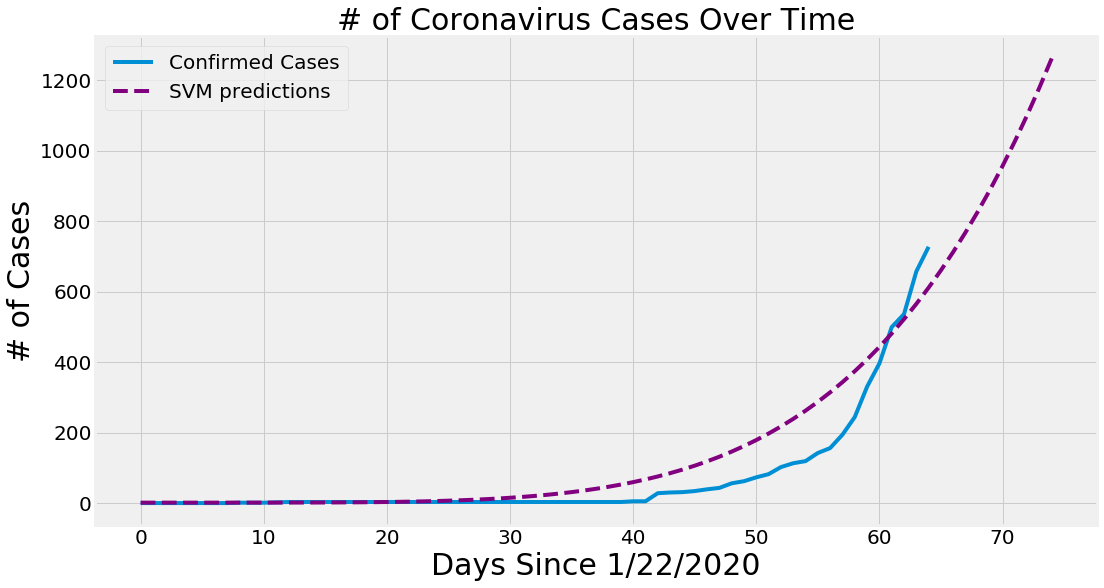

In [113]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [63]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed_india)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed_india)
poly_future_forcast = poly.fit_transform(future_forcast)

In [64]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed_india)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed_india))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed_india))

MAE: 163.18274060516416
MSE: 42139.343872368416


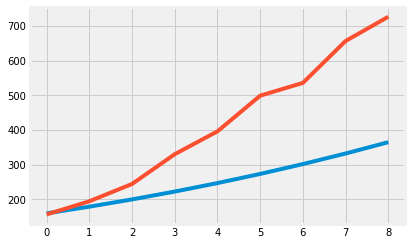

In [65]:
plt.plot(test_linear_pred)
plt.plot(y_test_confirmed_india)

In [66]:
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('03/27/2020', 775.0),
 ('03/28/2020', 836.0),
 ('03/29/2020', 900.0),
 ('03/30/2020', 968.0),
 ('03/31/2020', 1039.0),
 ('04/01/2020', 1114.0),
 ('04/02/2020', 1193.0),
 ('04/03/2020', 1276.0),
 ('04/04/2020', 1363.0),
 ('04/05/2020', 1454.0)}

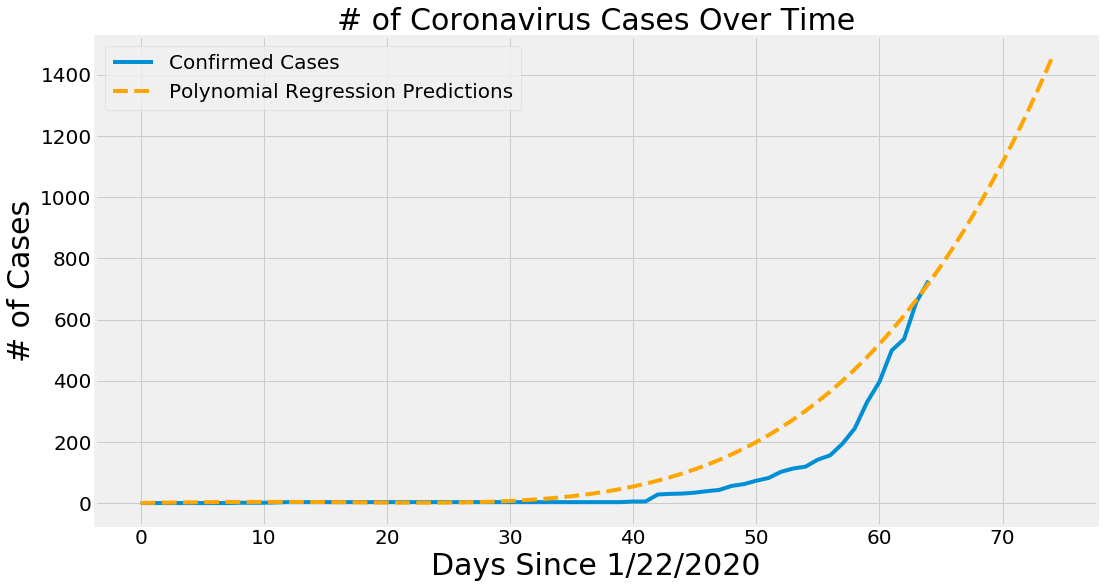

In [112]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()